Setup data.

In [ ]:
!pip install category_encoders
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import pointbiserialr
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fa23_datachallenge.csv')

In [ ]:
clean = df.drop(['TAIL_NUM', 'ORIGIN_AIRPORT_NAME', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID', 'DEST_CITY_NAME'], axis=1)
clean = clean.set_index('OP_CARRIER_FL_NUM')

In [ ]:
original_length = len(clean)
pd.DataFrame({'type':clean.dtypes, 'nan': clean.isna().sum()/len(clean)})

,type,nan
MONTH,int64,0.000000
DAY_OF_MONTH,int64,0.000000
DAY_OF_WEEK,int64,0.000000
OP_UNIQUE_CARRIER,object,0.000000
ORIGIN,object,0.000000
DEST,object,0.000000
CRS_DEP_TIME,int64,0.000000
DEP_TIME,float64,0.017577
DEP_DELAY_NEW,float64,0.017584
DEP_DEL15,float64,0.017584


In [ ]:
clean.dropna(subset=['DEP_TIME', 'DEP_DELAY_NEW', 'DEP_DEL15', 'ARR_TIME', 'ARR_DELAY_NEW', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME'],inplace=True)

Types of cancellation codes: CANCELLATION_CODE    0
dtype: int64
Point-Biserial Correlation Coefficient for CARRIER_DELAY: 0.1507039820538336
Point-Biserial Correlation Coefficient for WEATHER_DELAY: 0.0571710438549624
Point-Biserial Correlation Coefficient for NAS_DELAY: -0.09785602550224412
Point-Biserial Correlation Coefficient for SECURITY_DELAY: 0.013820283852336055
Point-Biserial Correlation Coefficient for LATE_AIRCRAFT_DELAY: 0.26275483054862614
Point-Biserial Correlation Coefficient for SNWD: 0.032243152141829046
Point-Biserial Correlation Coefficient for PSUN: -0.08748465592671181
Point-Biserial Correlation Coefficient for TSUN: -0.07322145641699189


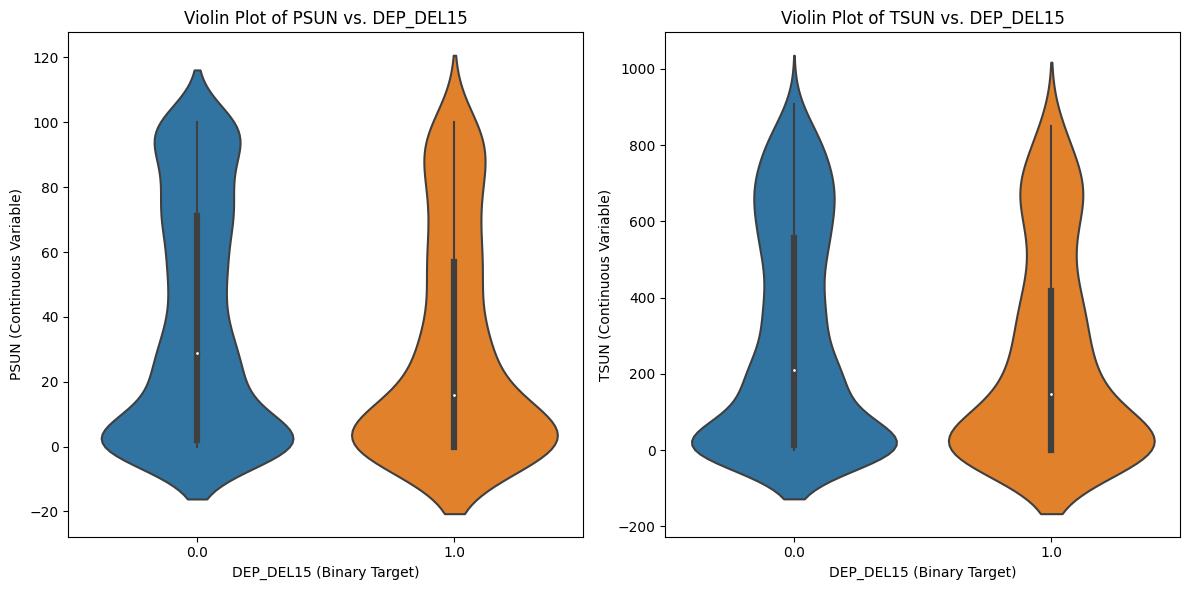

In [ ]:
print(f"Types of cancellation codes: {pd.DataFrame(clean['CANCELLATION_CODE']).dropna().nunique()}")
def printPBCC(df, col, targ):
  dropped = df.dropna(subset=[col, targ])
  correlation, p_value = pointbiserialr(dropped[col], dropped[targ])
  print(f"Point-Biserial Correlation Coefficient for {col}: {correlation}")
for col in ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'SNWD', 'PSUN', 'TSUN']:
  printPBCC(clean, col, 'DEP_DEL15')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create the first subplot for 'PSUN'
sns.violinplot(x='DEP_DEL15', y='PSUN', data=clean)
plt.xlabel('DEP_DEL15 (Binary Target)')
plt.ylabel('PSUN (Continuous Variable)')
plt.title('Violin Plot of PSUN vs. DEP_DEL15')

plt.subplot(1, 2, 2)  # Create the second subplot for 'TSUN'
sns.violinplot(x='DEP_DEL15', y='TSUN', data=clean)
plt.xlabel('DEP_DEL15 (Binary Target)')
plt.ylabel('TSUN (Continuous Variable)')
plt.title('Violin Plot of TSUN vs. DEP_DEL15')

plt.tight_layout()  # Ensures plots do not overlap
plt.show()


In [ ]:
clean.drop(['CANCELLATION_CODE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'SNWD', 'PSUN', 'TSUN'], axis=1, inplace=True)


In [ ]:
for col in clean.columns[clean.isna().any()].tolist():
  if clean[col].dtypes != type(0.00):
    continue
  printPBCC(clean, col, 'DEP_DEL15')

Point-Biserial Correlation Coefficient for PRCP: 0.09577206884223594
Point-Biserial Correlation Coefficient for SNOW: 0.06074889401567214
Point-Biserial Correlation Coefficient for TMIN: 0.0064302338170851535
Point-Biserial Correlation Coefficient for TMAX: -0.010330647913969175
Point-Biserial Correlation Coefficient for TAVG: -0.0005035366377699247
Point-Biserial Correlation Coefficient for AWND: 0.053997010862631825
Point-Biserial Correlation Coefficient for AIRPORT_FLIGHTS_MONTH: 0.025658459120528096
Point-Biserial Correlation Coefficient for AIRLINE_FLIGHTS_MONTH: 0.0013684668088100437
Point-Biserial Correlation Coefficient for AIRLINE_AIRPORT_FLIGHTS_MONTH: 0.012593370360514786
Point-Biserial Correlation Coefficient for AVG_MONTHLY_PASS_AIRPORT: 0.023255750692444045
Point-Biserial Correlation Coefficient for AVG_MONTHLY_PASS_AIRLINE: -0.0011922455278412579
Point-Biserial Correlation Coefficient for FLT_ATTENDANTS_PER_PASS: -0.004316856271589509
Point-Biserial Correlation Coefficie

In [ ]:
clean.dropna(subset=['PRCP'], inplace=True)
clean.drop(clean.columns[clean.isna().any()].tolist(), axis=1, inplace=True)
print(f"Kept {len(clean)/original_length} of the data.")

Kept 0.814750899349235 of the data.


In [ ]:
clean['DISTANCE_BLOCKS'] = pd.qcut(clean['DISTANCE'], q=8)

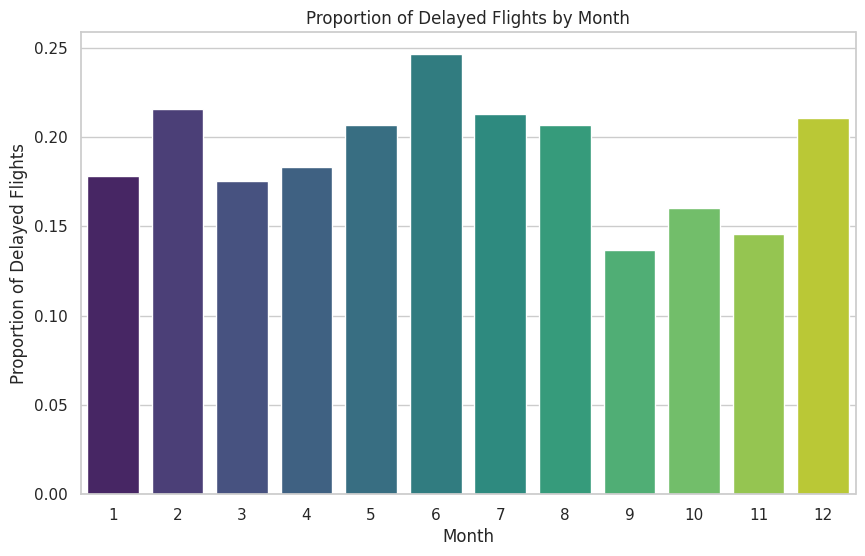

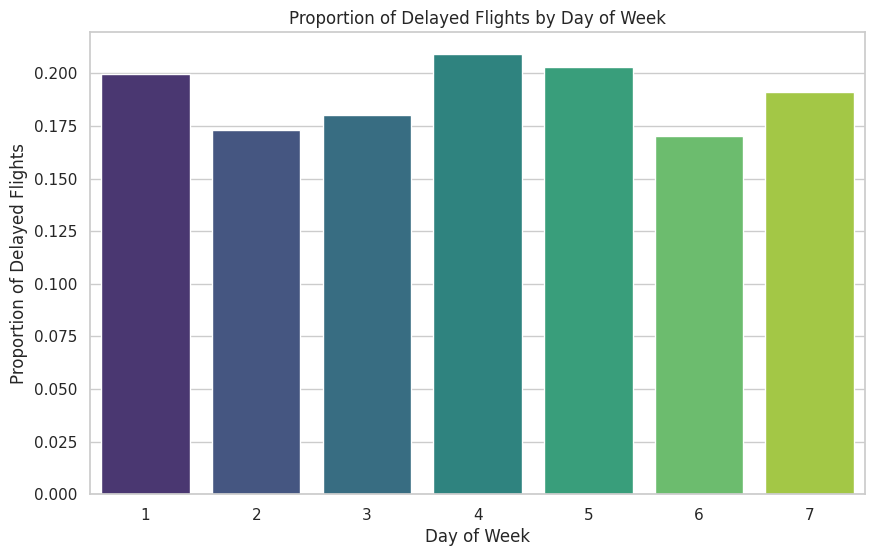

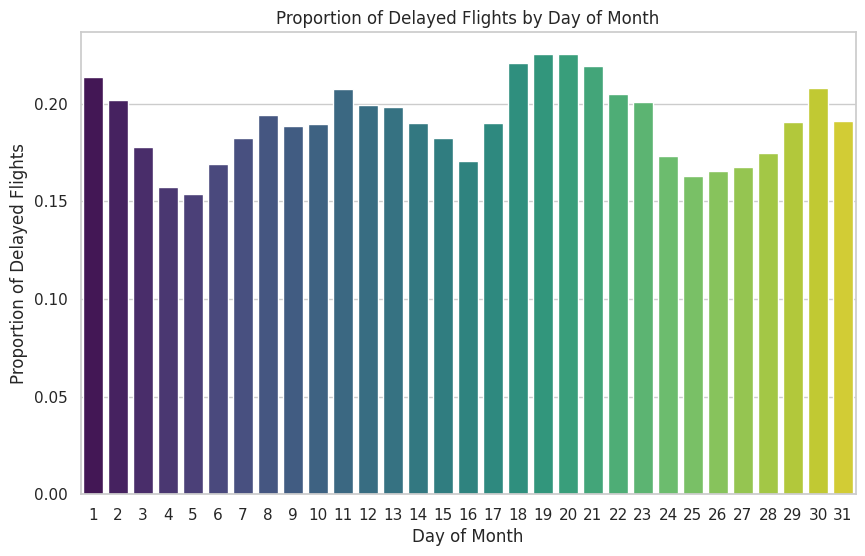

In [ ]:
# Set the style for seaborn plots (optional)
sns.set(style="whitegrid")

# 1.1 Effect of Time of Year on Delay
plt.figure(figsize=(10, 6))
sns.barplot(x='MONTH', y='DEP_DEL15', data=clean, errorbar=None, palette='viridis')
plt.title("Proportion of Delayed Flights by Month")
plt.xlabel("Month")
plt.ylabel("Proportion of Delayed Flights")
plt.xticks(rotation=0)
plt.show()

# 1.2 Effect of Time of Week on Delay
plt.figure(figsize=(10, 6))
sns.barplot(x='DAY_OF_WEEK', y='DEP_DEL15', data=clean, errorbar=None, palette='viridis')
plt.title("Proportion of Delayed Flights by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Proportion of Delayed Flights")
plt.xticks(rotation=0)
plt.show()

# 1.3 Effect of Day of Week on Delay
plt.figure(figsize=(10, 6))
sns.barplot(x='DAY_OF_MONTH', y='DEP_DEL15', data=clean, errorbar=None, palette='viridis')
plt.title("Proportion of Delayed Flights by Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Proportion of Delayed Flights")
plt.xticks(rotation=0)
plt.show()

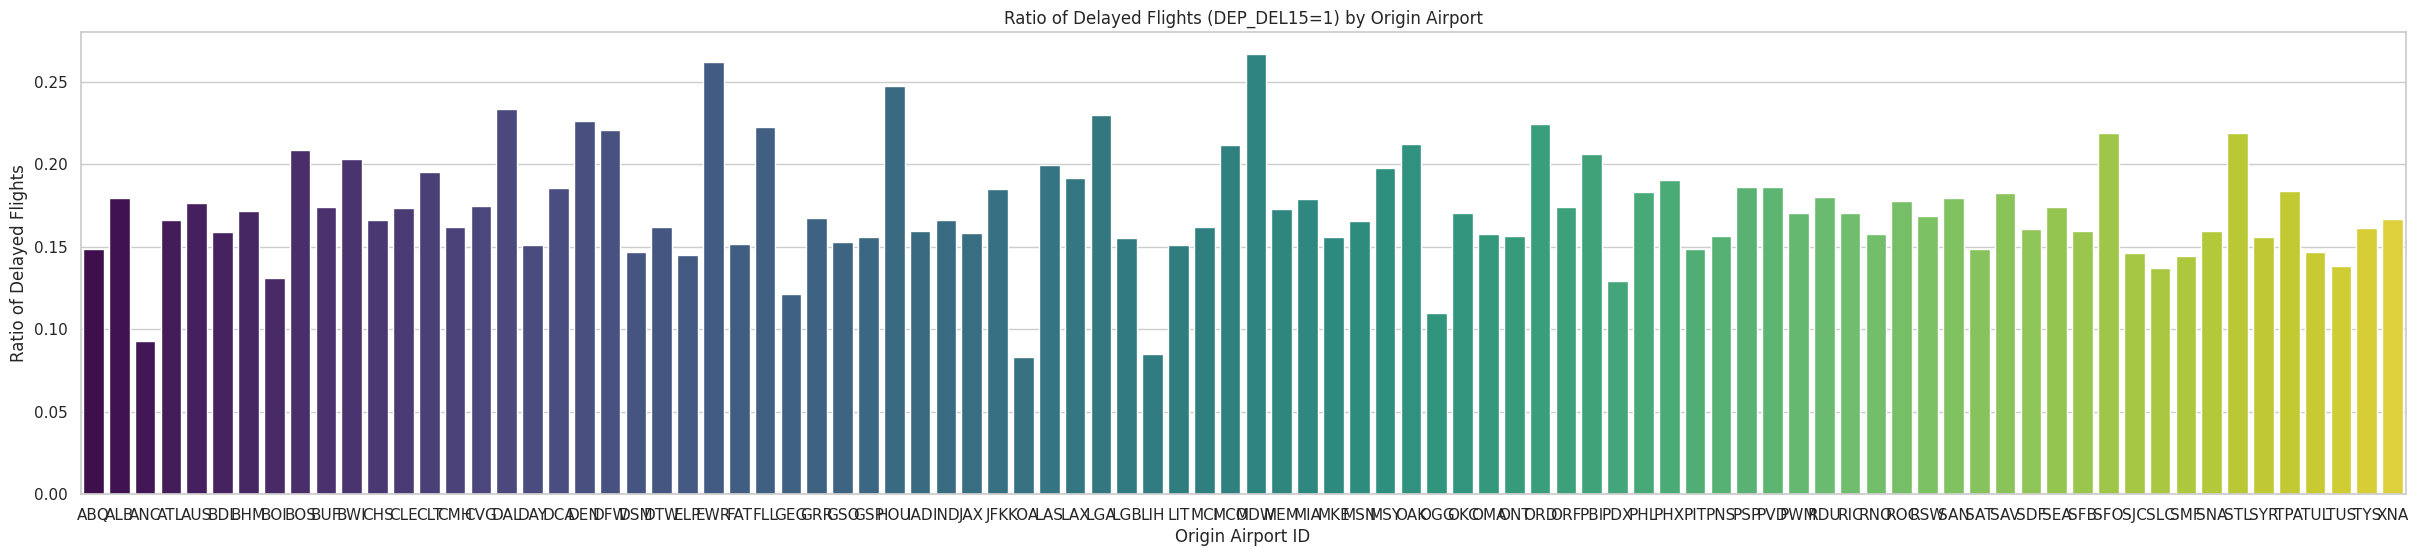

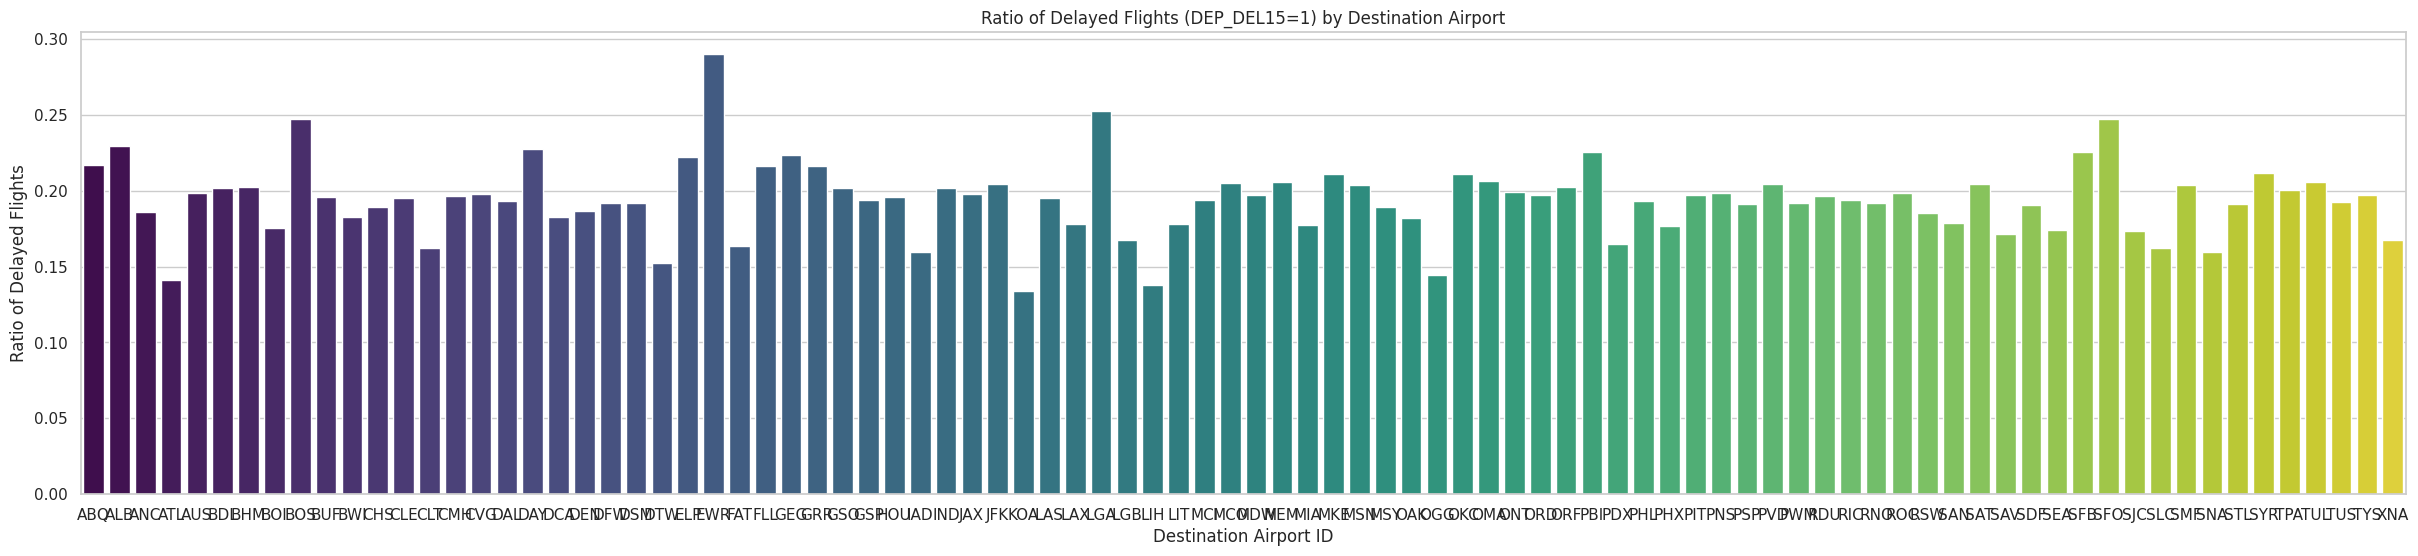

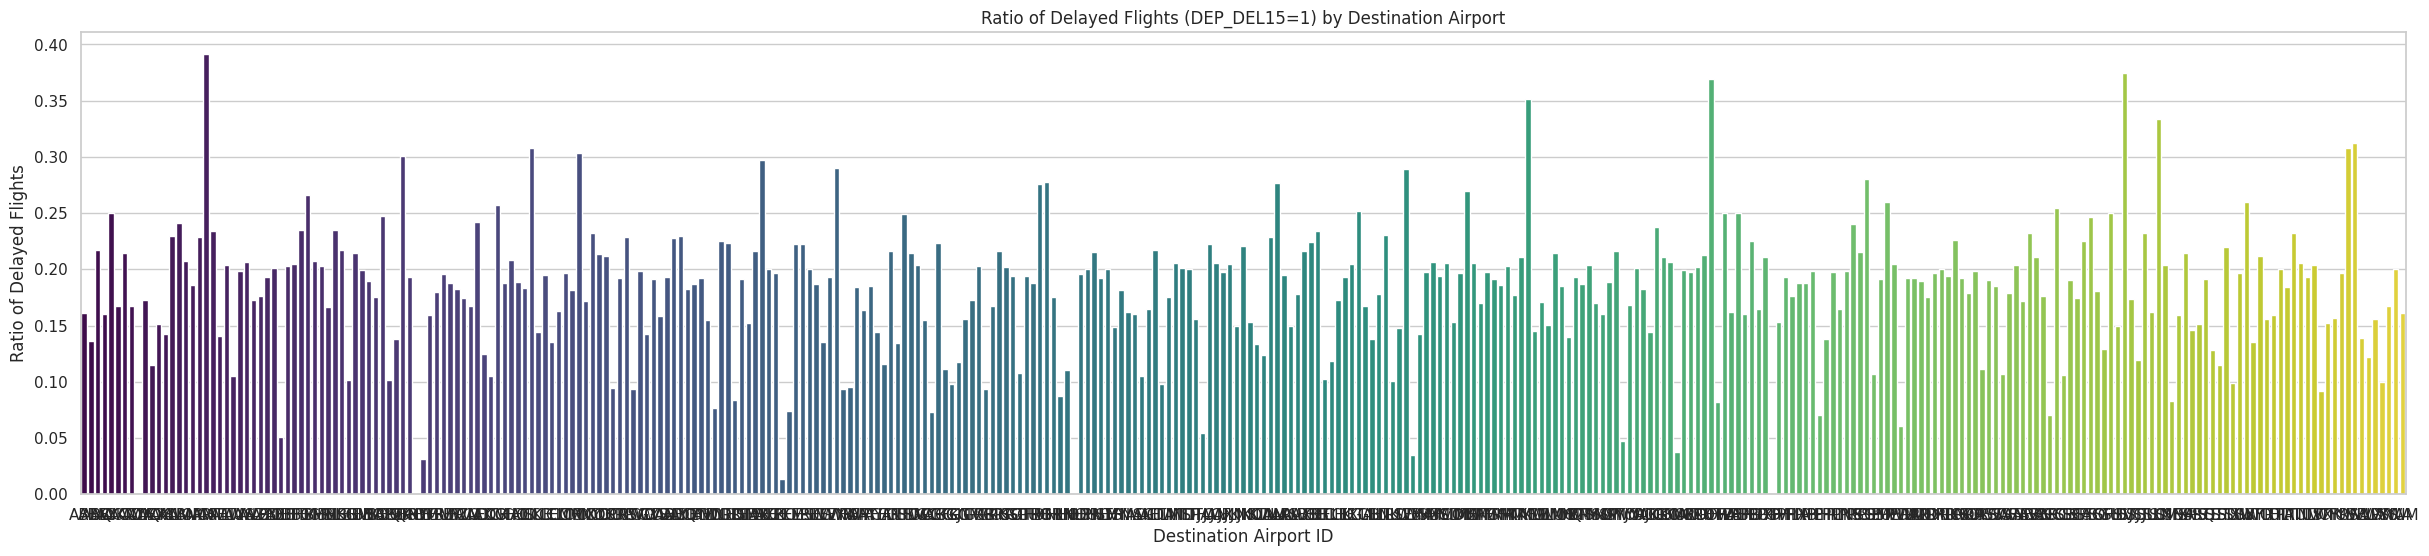

In [ ]:
# 2. Influence of Origin Airport
ratio_df = clean.groupby('ORIGIN')['DEP_DEL15'].mean().reset_index()
ratio_df.sort_values('ORIGIN')
# Create a countplot for the ratio
plt.figure(figsize=(30, 6))
sns.barplot(x='ORIGIN', y='DEP_DEL15', data=ratio_df, palette='viridis')
plt.title("Ratio of Delayed Flights (DEP_DEL15=1) by Origin Airport")
plt.xlabel("Origin Airport ID")
plt.ylabel("Ratio of Delayed Flights")
plt.xticks(rotation=0)
plt.show()

airports = clean['ORIGIN'].unique()
ratio_df = clean.groupby('DEST')['DEP_DEL15'].mean().reset_index()
ratio_df.sort_values('DEST')
ratio_df = ratio_df[ratio_df['DEST'].isin(airports)]

# Create a countplot for the ratio
plt.figure(figsize=(30, 6))
sns.barplot(x='DEST', y='DEP_DEL15', data=ratio_df, palette='viridis')
plt.title("Ratio of Delayed Flights (DEP_DEL15=1) by Destination Airport")
plt.xlabel("Destination Airport ID")
plt.ylabel("Ratio of Delayed Flights")
plt.xticks(rotation=0)
plt.show()

ratio_df = clean.groupby('DEST')['DEP_DEL15'].mean().reset_index()
ratio_df.sort_values('DEST')

# Create a countplot for the ratio
plt.figure(figsize=(30, 6))
sns.barplot(x='DEST', y='DEP_DEL15', data=ratio_df, palette='viridis')
plt.title("Ratio of Delayed Flights (DEP_DEL15=1) by Destination Airport")
plt.xlabel("Destination Airport ID")
plt.ylabel("Ratio of Delayed Flights")
plt.xticks(rotation=0)
plt.show()


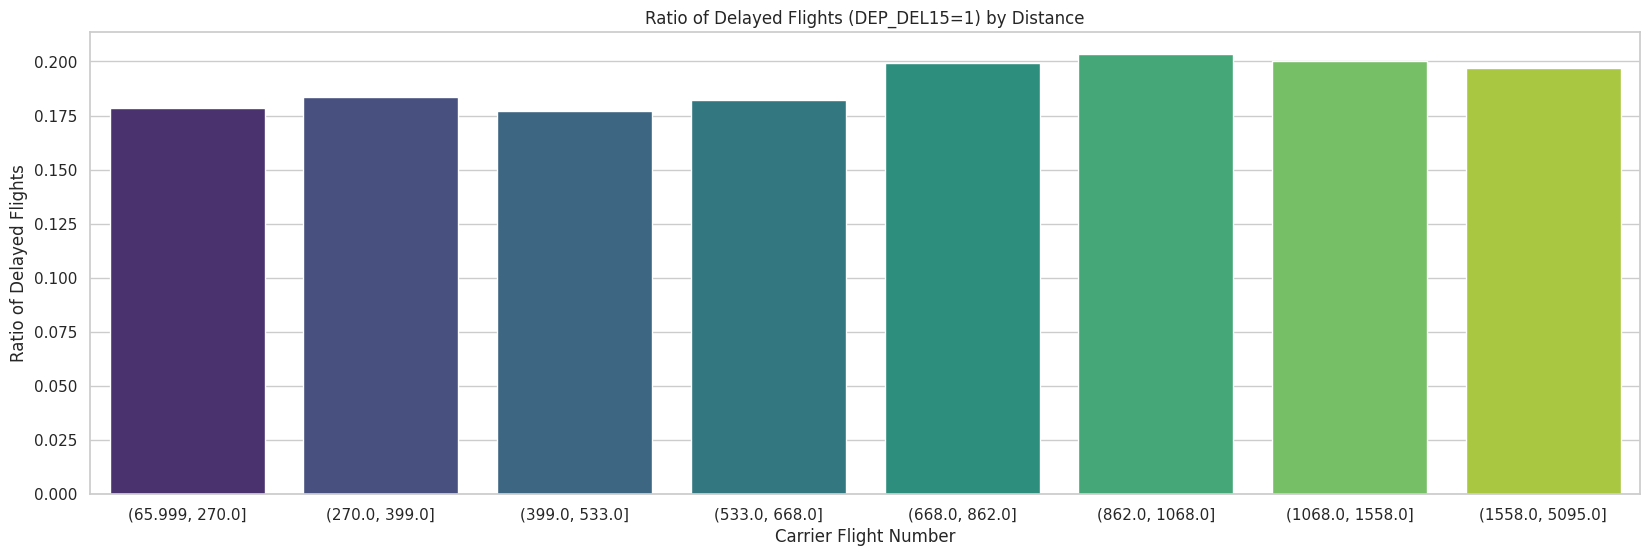

In [ ]:
# 3. Influence of Distance
ratio_df = clean.groupby('DISTANCE_BLOCKS')['DEP_DEL15'].mean().reset_index()

# Create a countplot for the ratio
plt.figure(figsize=(20, 6))
sns.barplot(x='DISTANCE_BLOCKS', y='DEP_DEL15', data=ratio_df, palette='viridis')
plt.title("Ratio of Delayed Flights (DEP_DEL15=1) by Distance")
plt.xlabel("Carrier Flight Number")
plt.ylabel("Ratio of Delayed Flights")
plt.xticks(rotation=0)
plt.show()

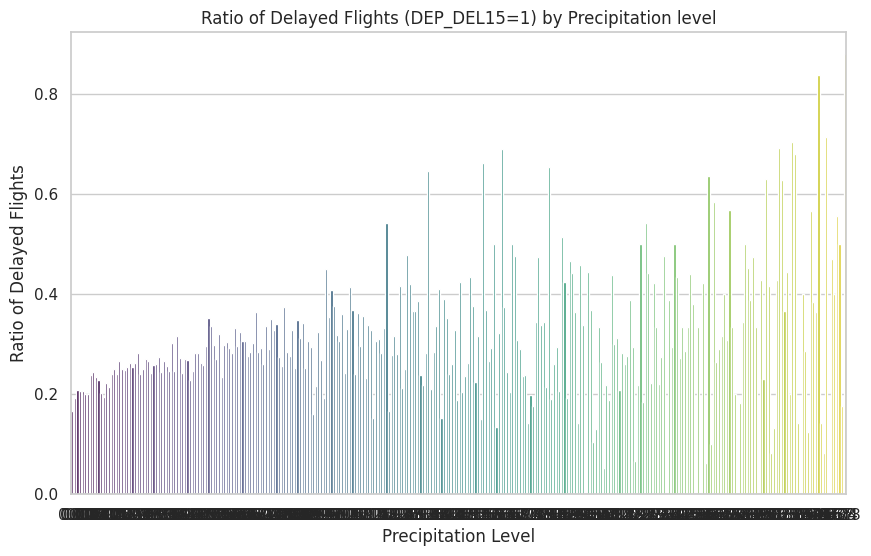

In [ ]:
# 4. Influence of PRCP (Precipitation)
ratio_df = clean.groupby('PRCP')['DEP_DEL15'].mean().reset_index()

# Create a countplot for the ratio
plt.figure(figsize=(10, 6))
sns.barplot(x='PRCP', y='DEP_DEL15', data=ratio_df, palette='viridis')
plt.title("Ratio of Delayed Flights (DEP_DEL15=1) by Precipitation level")
plt.xlabel("Precipitation Level")
plt.ylabel("Ratio of Delayed Flights")
plt.xticks(rotation=0)
plt.show()

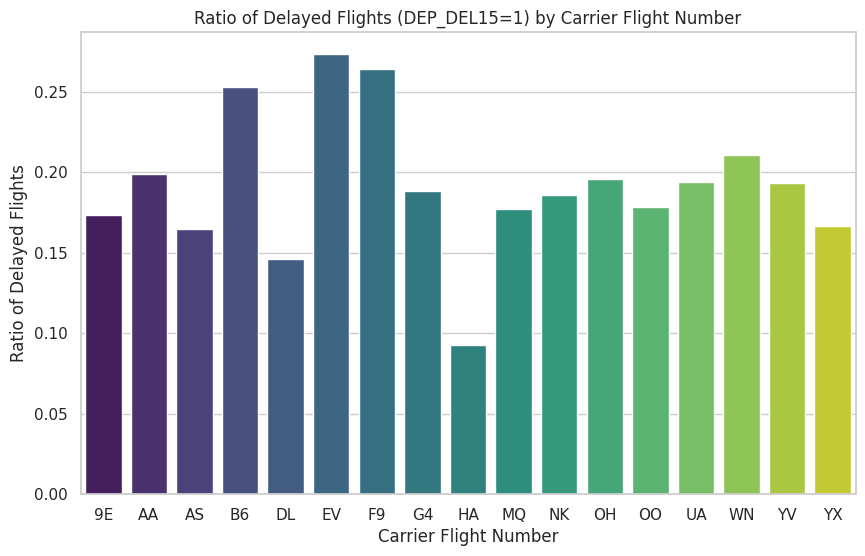

In [ ]:
ratio_df = clean.groupby('OP_UNIQUE_CARRIER')['DEP_DEL15'].mean().reset_index()

# Create a countplot for the ratio
plt.figure(figsize=(10, 6))
sns.barplot(x='OP_UNIQUE_CARRIER', y='DEP_DEL15', data=ratio_df, palette='viridis')
plt.title("Ratio of Delayed Flights (DEP_DEL15=1) by Carrier Flight Number")
plt.xlabel("Carrier Flight Number")
plt.ylabel("Ratio of Delayed Flights")
plt.xticks(rotation=0)
plt.show()

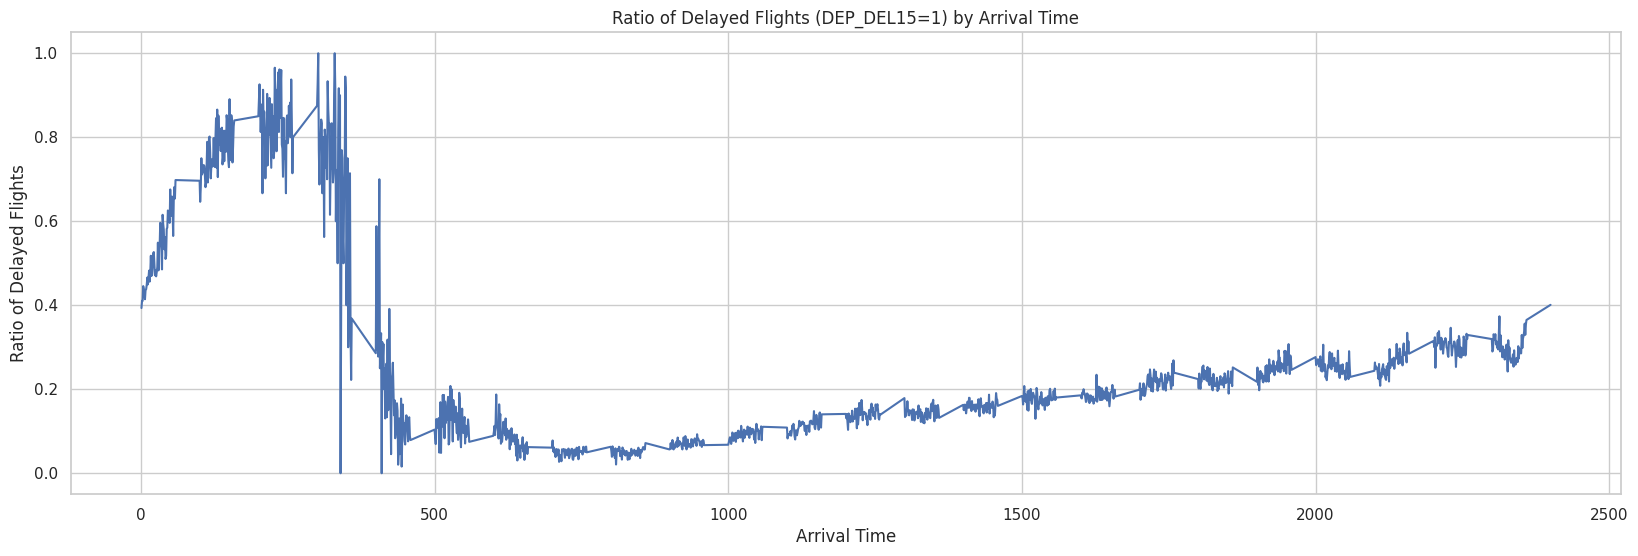

In [ ]:
# 6. Concentration of Delay on Departure and Arrival
ratio_df = clean.groupby('ARR_TIME')['DEP_DEL15'].mean().reset_index()

# Create a countplot for the ratio
plt.figure(figsize=(20, 6))
sns.lineplot(x='ARR_TIME', y='DEP_DEL15', data=ratio_df)
plt.title("Ratio of Delayed Flights (DEP_DEL15=1) by Arrival Time")
plt.xlabel("Arrival Time")
plt.ylabel("Ratio of Delayed Flights")
plt.xticks(rotation=0)
plt.show()

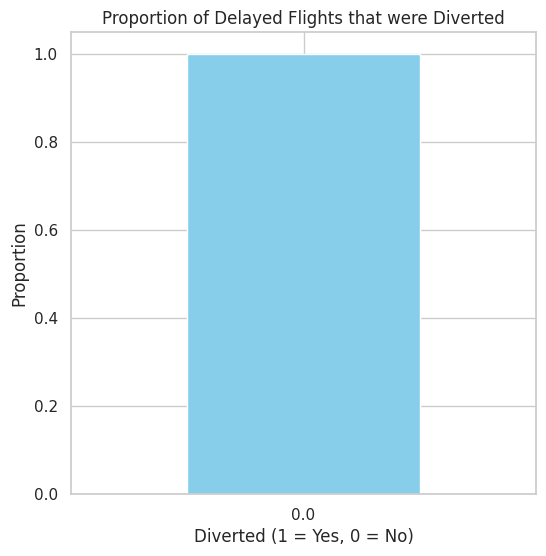

In [ ]:
# 7. Proportion of Delayed Flights that were Diverted
plt.figure(figsize=(6, 6))
delayed_diverted = clean[clean['DEP_DEL15'] == 1]['CANCELLED'].value_counts(normalize=True)
delayed_diverted.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Proportion of Delayed Flights that were Diverted")
plt.xlabel("Diverted (1 = Yes, 0 = No)")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

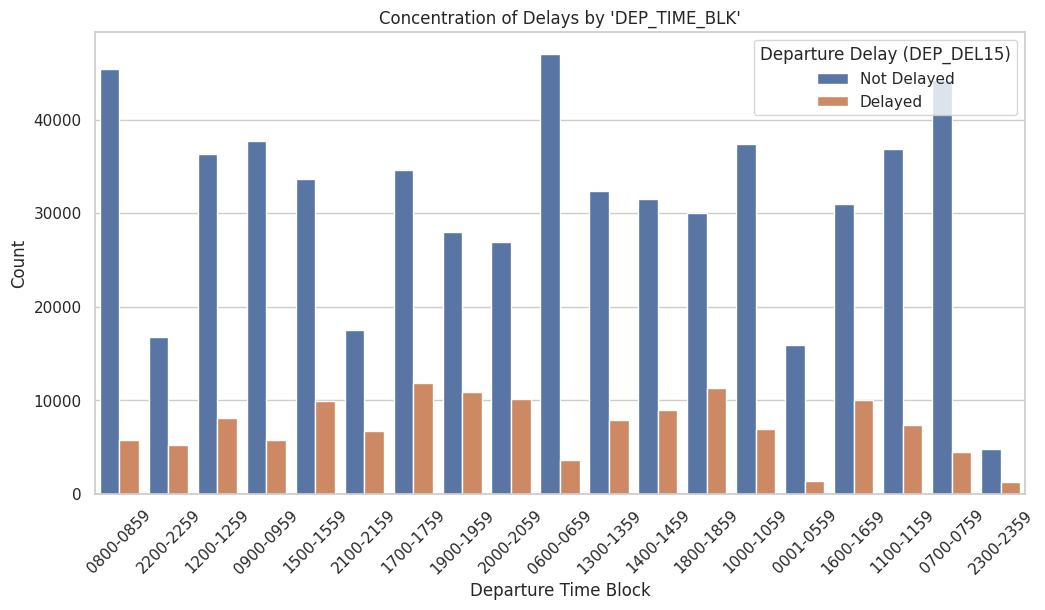

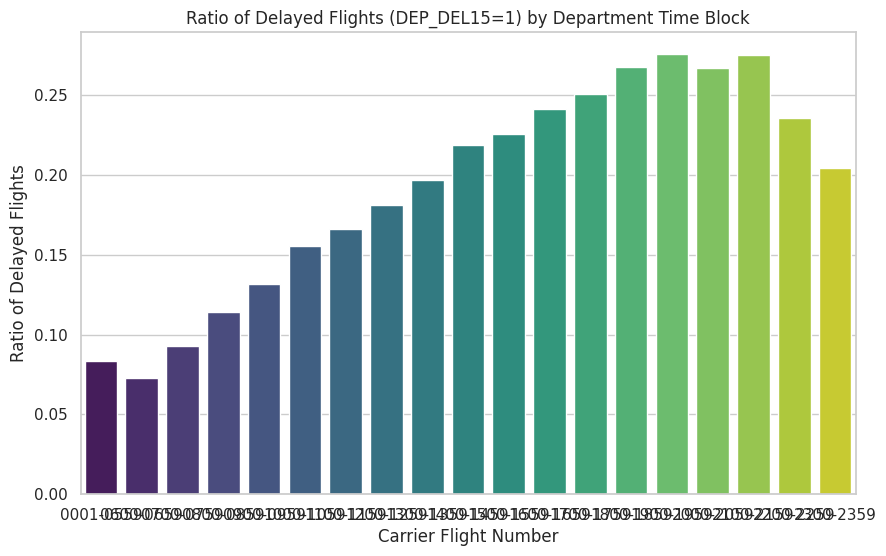

In [ ]:
# 8. Concentration of Delays by 'DEP_TIME_BLK'
plt.figure(figsize=(12, 6))
sns.countplot(x='DEP_TIME_BLK', hue='DEP_DEL15', data=clean)
plt.title("Concentration of Delays by 'DEP_TIME_BLK'")
plt.xlabel("Departure Time Block")
plt.ylabel("Count")
plt.legend(title="Departure Delay (DEP_DEL15)", labels=["Not Delayed", "Delayed"])
plt.xticks(rotation=45)
plt.show()

ratio_df = df.groupby('DEP_TIME_BLK')['DEP_DEL15'].mean().reset_index()

# Create a countplot for the ratio
plt.figure(figsize=(10, 6))
sns.barplot(x='DEP_TIME_BLK', y='DEP_DEL15', data=ratio_df, palette='viridis')
plt.title("Ratio of Delayed Flights (DEP_DEL15=1) by Department Time Block")
plt.xlabel("Carrier Flight Number")
plt.ylabel("Ratio of Delayed Flights")
plt.xticks(rotation=0)
plt.show()

In [ ]:
for col in ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST','DEP_DEL15', 'CANCELLED']:
  clean[col] = clean[col].astype('category')

In [ ]:
# Apply one-hot encoding using Category Encoders
# Split the DataFrame into train, test, and validation sets (80-15-5 split)
train_df, temp_df = train_test_split(clean, test_size=0.20, random_state=42)
test_df, valid_df = train_test_split(temp_df, test_size=0.25, random_state=42)

# Separate the target variables 'DEP_DELAY_NEW' and 'DEP_DEL15'
y_reg_train = train_df.pop('DEP_DELAY_NEW')
y_reg_test = test_df.pop('DEP_DELAY_NEW')
y_reg_valid = valid_df.pop('DEP_DELAY_NEW')

y_cls_train = train_df.pop('DEP_DEL15')
y_cls_test = test_df.pop('DEP_DEL15')
y_cls_valid = valid_df.pop('DEP_DEL15')

In [ ]:
# Apply one-hot encoding using Category Encoders
categorical_columns = list(clean.select_dtypes(['category']).columns)
categorical_columns.remove('DEP_DEL15')
encoder = ce.OneHotEncoder(cols=categorical_columns)
data_encoded = encoder.fit_transform(clean)

# Split the DataFrame into train, test, and validation sets (80-15-5 split)
train_df_encoded, temp_df_encoded = train_test_split(data_encoded, test_size=0.20, random_state=42)
test_df_encoded, valid_df_encoded = train_test_split(temp_df_encoded, test_size=0.25, random_state=42)

# Separate the target variables 'DEP_DELAY_NEW' and 'DEP_DEL15'
y_reg_train_encoded = train_df_encoded.pop('DEP_DELAY_NEW')
y_reg_test_encoded = test_df_encoded.pop('DEP_DELAY_NEW')
y_reg_valid_encoded = valid_df_encoded.pop('DEP_DELAY_NEW')

y_cls_train_encoded = train_df_encoded.pop('DEP_DEL15')
y_cls_test_encoded = test_df_encoded.pop('DEP_DEL15')
y_cls_valid_encoded = valid_df_encoded.pop('DEP_DEL15')

In [ ]:
def nn_b(input_shape):
  model = Sequential()
  # Add the first hidden layer with 16 nodes and ReLU activation
  model.add(Dense(16, activation='relu', input_shape=input_shape))

  # Add the second hidden layer with 16 nodes and ReLU activation
  model.add(Dense(16, activation='relu'))

  # Add the output layer with 1 node and sigmoid activation for binary classification
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam',  # You can choose a different optimizer if needed
                  loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
                  metrics=['accuracy'])
  return model

In [ ]:
nn_b_model = nn_b(train_df_encoded.shape)
early_stopping = EarlyStopping(monitor='val_accuracy',
                                   mode='max',
                                   patience=10,
                                   restore_best_weights=True)

# Example of training the model
history_nn_b = nn_b_model.fit(
    train_df_encoded, y_cls_train_encoded,  # Training data
    validation_data=(valid_df_encoded, y_cls_valid_encoded),  # Validation data
    epochs=100,  # Number of training epochs
    batch_size=32,  # Batch size
    callbacks=[early_stopping],  # Early stopping callback
    verbose=2  # Verbosity mode
)

